In [248]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
from patsy import dmatrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 0) Data Load

In [249]:
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'],dtype={'parcelid':int})

In [250]:
prop_16 = pd.read_csv('properties_2016.csv',dtype={'fireplaceflag':object, 'taxdelinquencyflag':object, 'fireplaceflag':object, 'propertyzoningdesc':object, 'propertycountylandusecode':object, 'hashottuborspa':object})

In [251]:
train_df = pd.merge(train_16,prop_16,on='parcelid', how ='left')

## 1) Filling the data

In [252]:
train_df.calculatedbathnbr = train_df.calculatedbathnbr.fillna(train_df.calculatedbathnbr.mode()[0])

In [253]:
train_df.fullbathcnt = train_df.fullbathcnt.fillna(train_df.fullbathcnt.mode()[0])

In [254]:
train_df.heatingorsystemtypeid = train_df.heatingorsystemtypeid.fillna(train_df.heatingorsystemtypeid.mode()[0])

In [255]:
train_df.heatingorsystemtypeid = train_df.heatingorsystemtypeid.astype('object')

In [256]:
train_df.garagecarcnt = train_df.garagecarcnt.fillna(train_df.garagecarcnt.mode()[0])

In [257]:
train_df.garagetotalsqft = train_df.garagetotalsqft.fillna(np.mean(train_df.garagetotalsqft))

In [258]:
train_df.airconditioningtypeid = train_df.airconditioningtypeid.fillna(train_df.airconditioningtypeid.mode()[0])

In [259]:
train_df.airconditioningtypeid = train_df.airconditioningtypeid.astype('object')

In [260]:
train_df.poolcnt = train_df.poolcnt.fillna(0)

In [261]:
train_df.poolcnt = train_df.poolcnt.astype('object')

In [262]:
train_df.pooltypeid7 = train_df.pooltypeid7.fillna(0)

In [263]:
train_df.pooltypeid7 = train_df.pooltypeid7.astype('object')

In [264]:
train_df.threequarterbathnbr = train_df.threequarterbathnbr.fillna(0)

In [265]:
train_df.hashottuborspa  = train_df.hashottuborspa .fillna('False')

In [266]:
train_df.bathroomcnt = train_df.bathroomcnt.fillna(train_df.bathroomcnt.mode()[0])

In [267]:
train_df.bedroomcnt = train_df.bedroomcnt.fillna(train_df.bedroomcnt.mode()[0])

In [268]:
train_df.fireplacecnt  = train_df.fireplacecnt .fillna(0)

In [269]:
train_df.fireplacecnt = train_df.fireplacecnt.astype('object')

In [270]:
train_df.pooltypeid2  = train_df.pooltypeid2 .fillna(0)

In [271]:
train_df.pooltypeid2 = train_df.pooltypeid2.astype('object')

In [272]:
train_df.pooltypeid10  = train_df.pooltypeid10 .fillna(0)

In [273]:
train_df.pooltypeid10 = train_df.pooltypeid10.astype('object')

In [274]:
train_df.poolsizesum  = train_df.poolsizesum .fillna(0)

In [275]:
train_df.fireplaceflag  = train_df.fireplaceflag .fillna('False')

In [276]:
train_df.yearbuilt = train_df.yearbuilt.fillna(train_df.yearbuilt.mode()[0])

In [277]:
train_df.unitcnt = train_df.unitcnt.fillna(train_df.unitcnt.mode()[0])

In [278]:
train_df.buildingqualitytypeid = train_df.buildingqualitytypeid.fillna(train_df.buildingqualitytypeid.mean())

In [279]:
train_df.buildingqualitytypeid = train_df.buildingqualitytypeid.astype('object')

In [280]:
train_df.numberofstories = train_df.numberofstories.fillna(train_df.numberofstories.mode()[0])

In [281]:
train_df.typeconstructiontypeid = train_df.typeconstructiontypeid.fillna('None')

In [282]:
train_df.typeconstructiontypeid = train_df.typeconstructiontypeid.astype('object')

In [283]:
train_df.architecturalstyletypeid = train_df.architecturalstyletypeid.fillna('None')

In [284]:
train_df.architecturalstyletypeid = train_df.architecturalstyletypeid.astype('object')

In [285]:
train_df.storytypeid = train_df.storytypeid.fillna('None')

In [286]:
train_df.storytypeid = train_df.storytypeid.astype('object')

In [287]:
train_df.buildingclasstypeid = train_df.buildingclasstypeid.fillna('None')

In [288]:
train_df.buildingclasstypeid = train_df.buildingclasstypeid.astype('object')

In [289]:
train_df.decktypeid = train_df.decktypeid.fillna('None')

In [290]:
train_df.decktypeid = train_df.decktypeid.astype('object')

In [291]:
train_df.propertycountylandusecode = train_df.propertycountylandusecode.fillna(train_df.propertycountylandusecode.mode()[0])

In [292]:
train_df.propertycountylandusecode = train_df.propertycountylandusecode.astype('object') 

In [293]:
train_df.propertylandusetypeid = train_df.propertylandusetypeid.astype('object') 

In [294]:
train_df.drop(columns='censustractandblock',inplace=True)

In [295]:
train_df.rawcensustractandblock = [str(raw)[:5] for raw in train_df.rawcensustractandblock]

In [296]:
train_df.fips = train_df.fips.astype('object') 

In [297]:
train_df.propertycountylandusecode = train_df.propertycountylandusecode.astype('object') 

In [298]:
train_df.regionidzip = train_df.regionidzip.fillna(train_df.regionidzip.mode()[0])

In [299]:
train_df.regionidzip = train_df.regionidzip.astype('object') 

In [300]:
train_df.regionidcity = train_df.regionidcity.fillna(train_df.regionidcity.mode()[0])

In [301]:
train_df.regionidcity = train_df.regionidcity.astype('object') 

In [302]:
train_df.regionidcounty = train_df.regionidcounty.astype('object') 

In [303]:
train_df.propertyzoningdesc = train_df.propertyzoningdesc.fillna('None')

In [304]:
train_df.propertyzoningdesc = train_df.propertyzoningdesc.astype('object') 

In [305]:
train_df.regionidneighborhood = train_df.regionidneighborhood.fillna((np.mean(train_df.regionidneighborhood)))

In [306]:
train_df.calculatedfinishedsquarefeet = train_df.calculatedfinishedsquarefeet.fillna(train_df.calculatedfinishedsquarefeet.mode()[0])

In [307]:
train_df.finishedsquarefeet12 = train_df.finishedsquarefeet12.fillna(train_df.finishedsquarefeet12.mode()[0])

In [308]:
train_df.lotsizesquarefeet = train_df.lotsizesquarefeet.fillna(train_df.lotsizesquarefeet.mode()[0])

In [309]:
train_df.finishedfloor1squarefeet = train_df.finishedfloor1squarefeet.fillna(0)

In [310]:
train_df.finishedsquarefeet50 = train_df.finishedsquarefeet50.fillna(0)

In [311]:
train_df.finishedsquarefeet15 = train_df.finishedsquarefeet15.fillna(0)

In [312]:
train_df.finishedsquarefeet6 = train_df.finishedsquarefeet6.fillna(0)

In [313]:
train_df.basementsqft = train_df.basementsqft.fillna(0)

In [314]:
train_df.finishedsquarefeet13 = train_df.finishedsquarefeet13.fillna(0)

In [315]:
train_df.drop(columns='assessmentyear',inplace=True)

In [316]:
train_df.taxvaluedollarcnt  = train_df.taxvaluedollarcnt .fillna(np.mean(train_df.taxvaluedollarcnt))

In [317]:
train_df.landtaxvaluedollarcnt  = train_df.landtaxvaluedollarcnt .fillna(np.mean(train_df.landtaxvaluedollarcnt))

In [318]:
train_df.taxamount = train_df.taxamount.fillna(np.mean(train_df.taxamount))

In [319]:
train_df.structuretaxvaluedollarcnt = train_df.structuretaxvaluedollarcnt.fillna(np.mean(train_df.structuretaxvaluedollarcnt))

In [320]:
train_df.taxdelinquencyflag = train_df.taxdelinquencyflag.fillna('F')

In [321]:
train_df.taxdelinquencyyear = train_df.taxdelinquencyyear.fillna('None')

In [322]:
train_df.yardbuildingsqft17 = train_df.yardbuildingsqft17.fillna(0)

In [323]:
train_df.yardbuildingsqft26 = train_df.yardbuildingsqft26.fillna(0)

## 2) Correlation

In [324]:
numerical_features = [col for col in train_df.columns if train_df[col].dtypes != 'object']
categorical_features = [col for col in train_df.columns if train_df[col].dtypes == 'object']

In [325]:
numerical_features.remove('transactiondate')
numerical_features.remove('logerror')
numerical_features.remove('parcelid')

In [326]:
correl_val = []
for col in numerical_features:
    correl_val.append(np.corrcoef(train_df['logerror'],train_df[col])[0][1])
len(correl_val)
correl_val = sorted(correl_val)

### 2.1) features(x) vs logerror(y)

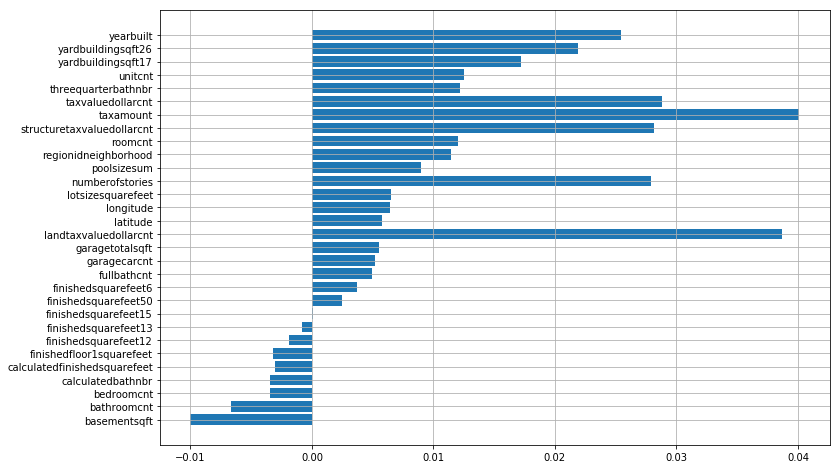

In [327]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.barh(numerical_features,correl_val)
plt.show()

### 2.2) features(x) vs features(x)

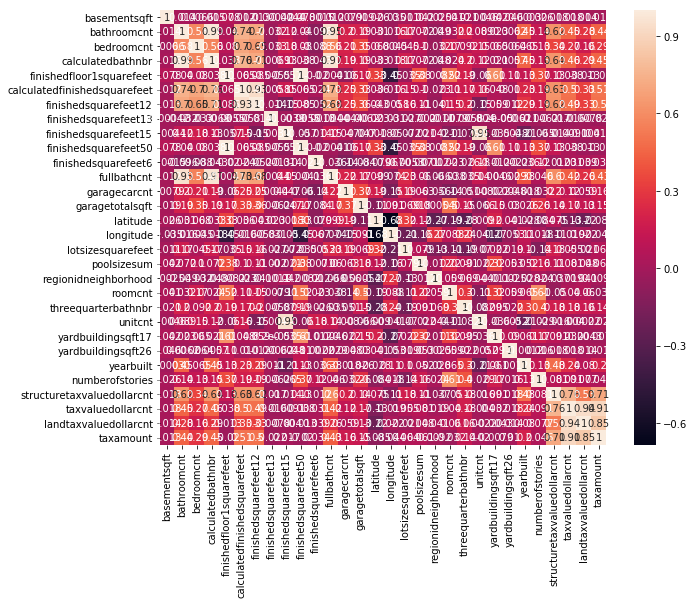

In [328]:
plt.figure(figsize=(25,25))
corrmat = train_df[numerical_features].corr(method = 'spearman')
plt.figure(figsize=(10,8))
sns.heatmap(corrmat,annot=True)
plt.show()

In [329]:
train_n = train_df[numerical_features]
train_n = sm.add_constant(train_n)
train_y = train_df['logerror']

## 3) Numerical variable OLS

### 3.1) VIF 검정을 통한 독립변수 독립성 검정
- 1 = not correlated.
- Between 1 and 5 = moderately correlated.
- Greater than 5 = highly correlated.

In [330]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(train_n.values, i) for i in range(train_n.shape[1])]
vif["features"] = train_n.columns
vif.sort_values(by='VIF Factor',inplace=True)
vif.reset_index(drop=True,inplace=True)
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,1.016379,basementsqft
2,1.033683,yardbuildingsqft26
3,1.038972,finishedsquarefeet13
4,1.048074,lotsizesquarefeet
5,1.062088,regionidneighborhood
6,1.359771,poolsizesum
7,1.368352,unitcnt
8,1.491472,yardbuildingsqft17
9,1.631978,yearbuilt


In [331]:
vif_ls = ['finishedsquarefeet50' ,'finishedfloor1squarefeet' ,'structuretaxvaluedollarcnt' ,'landtaxvaluedollarcnt' ,'taxvaluedollarcnt' ,'fullbathcnt' ,'calculatedbathnbr' ,'threequarterbathnbr','finishedsquarefeet12', 'calculatedfinishedsquarefeet' ,'yearbuilt', 'latitude', 'longitude']
for col in vif_ls:
    numerical_features.remove(col)

#### 제거된 numerical variable 
- 'finishedsquarefeet50' ,'finishedfloor1squarefeet' ,'structuretaxvaluedollarcnt' ,'landtaxvaluedollarcnt' ,'taxvaluedollarcnt' ,'fullbathcnt' ,'calculatedbathnbr' ,'threequarterbathnbr','finishedsquarefeet12', 'calculatedfinishedsquarefeet' ,'yearbuilt', 'latitude', 'longitude'

### 3.2) F-test and T-test를 통한 변수 중요도 검정
- 유의수준 30% 이상

In [332]:
model1_1_formula = sm.OLS.from_formula('logerror ~ scale(basementsqft)+ scale(bathroomcnt) +scale(bedroomcnt) + scale(finishedsquarefeet13) +scale(finishedsquarefeet15)  +scale(finishedsquarefeet6)+scale(garagecarcnt)+ scale(garagetotalsqft)+scale(lotsizesquarefeet) +scale(poolsizesum) + scale(regionidneighborhood)+ scale(roomcnt)+ scale(unitcnt) +scale(yardbuildingsqft17)+ scale(yardbuildingsqft26)+scale(numberofstories) + scale(taxamount)',train_df)
result1_1_formula = model1_1_formula.fit()
print(result1_1_formula.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.926
Date:                Fri, 06 Jul 2018   Prob (F-statistic):           1.17e-23
Time:                        20:34:05   Log-Likelihood:                 36811.
No. Observations:               90275   AIC:                        -7.359e+04
Df Residuals:                   90257   BIC:                        -7.342e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [333]:
sm.stats.anova_lm(result1_1_formula, typ=2).sort_values('PR(>F)')

,sum_sq,df,F,PR(>F)
scale(taxamount),1.094701,1.0,42.253837,8.057852e-11
scale(bathroomcnt),1.048618,1.0,40.475129,2.000846e-10
scale(bedroomcnt),0.224313,1.0,8.658157,3.256832e-03
scale(basementsqft),0.170935,1.0,6.597826,1.021193e-02
scale(finishedsquarefeet15),0.130715,1.0,5.045426,2.469345e-02
scale(poolsizesum),0.087166,1.0,3.364475,6.662009e-02
scale(lotsizesquarefeet),0.066976,1.0,2.585171,1.078722e-01
scale(finishedsquarefeet13),0.066127,1.0,2.552402,1.101302e-01
scale(garagecarcnt),0.036805,1.0,1.420633,2.333023e-01
scale(numberofstories),0.020684,1.0,0.798383,3.715796e-01


In [334]:
test_ls =['finishedsquarefeet6' , 'garagetotalsqft' , 'regionidneighborhood' , 'roomcnt' , 'unitcnt' , 'yardbuildingsqft17' , 'yardbuildingsqft26' , 'numberofstories' ]
for col in test_ls:
    numerical_features.remove(col)

#### 제거된 numerical variable
- finishedsquarefeet6 , garagetotalsqft , regionidneighborhood , roomcnt , unitcnt , yardbuildingsqft17 , yardbuildingsqft26 , numberofstories

### 3.2) Numerical variable OLS 후

In [335]:
train_n = train_df[numerical_features]

In [336]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(train_n.values, i) for i in range(train_n.shape[1])]
vif["features"] = train_n.columns
vif.sort_values(by='VIF Factor',inplace=True)
vif.reset_index(drop=True,inplace=True)
vif

,VIF Factor,features
0,1.001984,basementsqft
1,1.003049,finishedsquarefeet13
2,1.018820,poolsizesum
3,1.073771,lotsizesquarefeet
4,1.161011,finishedsquarefeet15
5,2.274189,taxamount
6,8.871887,garagecarcnt
7,12.932162,bathroomcnt
8,14.213242,bedroomcnt


In [337]:
model1_2 = sm.OLS.from_formula('logerror ~ scale(basementsqft) + scale(bathroomcnt) + scale(bedroomcnt) + scale(finishedsquarefeet13) + scale(finishedsquarefeet15) + scale(garagecarcnt) + scale(lotsizesquarefeet)+ scale(poolsizesum) + scale(taxamount) ',train_df)
result1_2 = model1_2.fit()
print(result1_2.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     16.50
Date:                Fri, 06 Jul 2018   Prob (F-statistic):           1.87e-27
Time:                        20:34:12   Log-Likelihood:                 36810.
No. Observations:               90275   AIC:                        -7.360e+04
Df Residuals:                   90265   BIC:                        -7.351e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [338]:
sm.stats.anova_lm(result1_2, typ=2).sort_values('PR(>F)')

,sum_sq,df,F,PR(>F)
scale(taxamount),1.163068,1.0,44.895116,2.090905e-11
scale(bathroomcnt),1.094741,1.0,42.257631,8.042239e-11
scale(bedroomcnt),0.273456,1.0,10.555563,1.158813e-03
scale(finishedsquarefeet15),0.265144,1.0,10.234694,1.378711e-03
scale(basementsqft),0.174138,1.0,6.721826,9.525543e-03
scale(garagecarcnt),0.103492,1.0,3.994854,4.564240e-02
scale(poolsizesum),0.077832,1.0,3.004358,8.304427e-02
scale(finishedsquarefeet13),0.066935,1.0,2.583712,1.079717e-01
scale(lotsizesquarefeet),0.066321,1.0,2.560040,1.095993e-01
Residual,2338.436398,90265.0,NaN,NaN


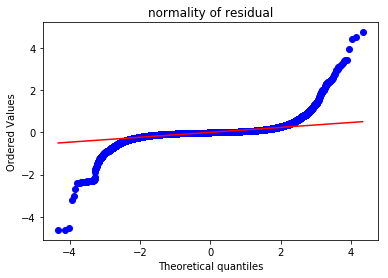

In [339]:
sp.stats.probplot(result1_2.resid, plot=plt)
plt.title('normality of residual')
plt.show()

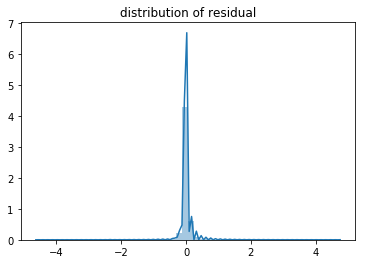

In [340]:
sns.distplot(result1_2.resid)
plt.title('distribution of residual')
plt.show()

logerror가 0 근처의 값으로 대부분 구성되어 있고, 대칭형태를 띄기 때문에, 변수 변환을 통한 성능 향상이 어려운 상태이다.

- VIF를 통해 변수의 독립성이 보여졌고, f-test , t-test를 통해 본 결과, 해당 파라미터가 0이라는 귀무가설을 accept한다는 뚜렷한 컬럼이 보이지 않는다. 따라서 Numerical variable에 대한 Feature Engineering 은 위의 컬럼 9개로 Setting한다.
- 잔차의 정규성을 만족하지 못했으므로, 전체 모형이 선형회귀모형의 가정을 만족하지는 못한다.

## 4) Categorical Variable OLS 

In [341]:
train_c = train_df[categorical_features]
train_y = train_df['logerror']

클래스가 많은 regionidzip, regionidcity, propertyzoningdesc, propertycountylandusecode를 제외하고 OLS를 돌려본다.

In [342]:
model2_1 = sm.OLS.from_formula('logerror ~ 0 + C(airconditioningtypeid) +C(regionidcounty)+ C(architecturalstyletypeid)+C(rawcensustractandblock) + C(buildingqualitytypeid) + C(buildingclasstypeid) + C(decktypeid) + C(fips) + C(hashottuborspa) + C(heatingorsystemtypeid) + C(poolcnt) + C(pooltypeid10) + C(pooltypeid2) + C(pooltypeid7) + C(propertylandusetypeid) + C(storytypeid) + C(typeconstructiontypeid) + C(fireplaceflag) + C(taxdelinquencyflag) + C(taxdelinquencyyear)',train_df)
result2_1 = model2_1.fit()

In [343]:
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.609
Date:                Fri, 06 Jul 2018   Prob (F-statistic):           8.00e-36
Time:                        20:34:20   Log-Likelihood:                 36906.
No. Observations:               90275   AIC:                        -7.366e+04
Df Residuals:                   90200   BIC:                        -7.296e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

- 카테고리 변수들끼리 다중공선성이 너무 짙게 나온다.
- 카테고리 변수들의 중요성 파악을 먼저하고 컬럼들을 선별한 후에, 차원을 축소시켜서 독립성을 성립시킨다.

### 4.1) One-way ANOVA
- 카테고리 변수들을 중요도 순으로 10개를 뽑았다.
- C(taxdelinquencyflag) + C(taxdelinquencyyear) + C(regionidcounty) + C(buildingqualitytypeid) + C(fips)+ C(poolcnt)+ C(pooltypeid7)+ C(rawcensustractandblock)+ C(propertylandusetypeid)+ C(propertycountylandusecode)

top3

In [344]:
model2_4 = sm.OLS.from_formula('logerror ~ C(regionidcity)+ C(propertylandusetypeid)+ C(propertycountylandusecode) + 0',train_df)
result2_4 = model2_4.fit()
print(result2_4.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     5.455
Date:                Fri, 06 Jul 2018   Prob (F-statistic):          3.35e-155
Time:                        20:34:30   Log-Likelihood:                 37433.
No. Observations:               90275   AIC:                        -7.435e+04
Df Residuals:                   90017   BIC:                        -7.192e+04
Df Model:                         257                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [345]:
top_10_col = ['taxdelinquencyflag','taxdelinquencyyear','regionidcounty','buildingqualitytypeid','fips','poolcnt','pooltypeid7','rawcensustractandblock','propertylandusetypeid','propertycountylandusecode']
for col in top_10_col:
    print(col,len(train_df[col].value_counts()))

taxdelinquencyflag 2
taxdelinquencyyear 12
regionidcounty 3
buildingqualitytypeid 9
fips 3
poolcnt 2
pooltypeid7 2
rawcensustractandblock 12
propertylandusetypeid 14
propertycountylandusecode 77


- 클래스의 수가 너무 많으면, 위의 Numerical variable과 병합해서 OLS할 때, 조건수가 너무 크게 나오는 경향이 있어서 10등 안에 있는 컬럼 중에 클래스가 낮은 컬럼을 모아서 OLS를 돌려본다.
- 또한, 클래스 중에 property~ , region~ 의 이름의 컬럼은 zip code, postal code 등으로 같은 것을 대표하는 값들이 많아, feature별로 나눠서 같은 컬럼들끼리 OLS를 돌리게 되면 조건수가 높게 나오게 된다. 다른 Feature끼리 묶어서 OLS를 돌리고, 성능이 좋은 것을 채택한다.

### 4.2) Categorical variable OLS 후

In [346]:
model2_5 = sm.OLS.from_formula('logerror ~ C(regionidcounty)+C(taxdelinquencyflag)+0',train_df)
result2_5 = model2_5.fit()
print(result2_5.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.45
Date:                Fri, 06 Jul 2018   Prob (F-statistic):           2.10e-09
Time:                        20:34:31   Log-Likelihood:                 36757.
No. Observations:               90275   AIC:                        -7.351e+04
Df Residuals:                   90271   BIC:                        -7.347e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
C(regionidcounty)[12

In [347]:
model2_5reduced = sm.OLS.from_formula('logerror ~ C(regionidcounty)+0',train_df)
result2_5reduced = model2_5reduced.fit()
print(result2_5reduced.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.278
Date:                Fri, 06 Jul 2018   Prob (F-statistic):            0.00510
Time:                        20:34:32   Log-Likelihood:                 36741.
No. Observations:               90275   AIC:                        -7.348e+04
Df Residuals:                   90272   BIC:                        -7.345e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
C(regionidcounty)[1286

In [348]:
sm.stats.anova_lm(result2_5, typ=2).sort_values(by='PR(>F)')

,sum_sq,df,F,PR(>F)
C(regionidcounty),11.03899,3.0,141.881294,1.014590e-91
C(taxdelinquencyflag),0.85013,1.0,32.779520,1.035528e-08
Residual,2341.16052,90271.0,NaN,NaN


## 5) Merge the Numerical and Categorical data

In [349]:
train_col = pd.concat([train_n,train_c],axis=1)
train_al = pd.concat([train_col,train_y],axis=1)

## 6) Outlier & Cook's Distance

In [350]:
model1 = sm.OLS.from_formula('logerror ~ scale(basementsqft) + scale(bathroomcnt) + scale(bedroomcnt) + scale(finishedsquarefeet13) + scale(finishedsquarefeet15) + scale(garagecarcnt) + scale(lotsizesquarefeet)+ scale(poolsizesum) + scale(taxamount) +C(regionidcounty)+C(taxdelinquencyflag)+0',train_al)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     16.34
Date:                Fri, 06 Jul 2018   Prob (F-statistic):           2.27e-35
Time:                        20:34:40   Log-Likelihood:                 36833.
No. Observations:               90275   AIC:                        -7.364e+04
Df Residuals:                   90262   BIC:                        -7.352e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
C(regionidcounty)[

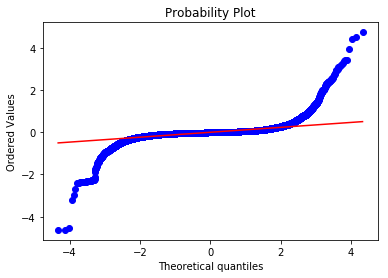

In [351]:
sp.stats.probplot(result1.resid,plot=plt)
plt.show()

### 6.1) Outlier

In [352]:
idx_r = np.where(result1.resid_pearson > 2)[0]

### 6.2) Cook's Distance

In [353]:
influence = result1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(train_al) - len(train_col.columns) - 1)
idx_c = np.where(cooks_d2 > fox_cr)[0]

In [354]:
resid_outliers = idx_r.tolist()
cooks_outliers = idx_c.tolist()

In [355]:
resid_cooks = list(set(resid_outliers) | set(cooks_outliers))
print("Resid_Cooks_distance :", len(resid_cooks ),"개 \n")

Resid_Cooks_distance : 3198 개 



### 6.3) Drop Outlier & Cook's Distance

In [356]:
# Remove outliers after selecting variables
train_col = train_col.drop(resid_cooks)

train_y = train_y.drop(resid_cooks)

train_new = pd.concat([train_y, train_col], axis=1)
train_new.tail()

,logerror,basementsqft,bathroomcnt,bedroomcnt,finishedsquarefeet13,finishedsquarefeet15,garagecarcnt,lotsizesquarefeet,poolsizesum,taxamount,...,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,storytypeid,typeconstructiontypeid,fireplaceflag,taxdelinquencyflag,taxdelinquencyyear
90268,-0.0151,0.0,3.0,3.0,0.0,0.0,2.0,5001.0,0.0,5853.81,...,CORL*,60375,24174,3101,96092,None,None,False,F,None
90269,0.0344,0.0,2.0,3.0,0.0,0.0,2.0,7594.0,0.0,5311.03,...,CVR17500*,60374,24245,3101,96473,None,None,False,F,None
90270,-0.0356,0.0,1.0,1.0,0.0,0.0,2.0,93676.0,0.0,2495.24,...,LARD1.5,60371,12447,3101,96364,None,None,False,F,None
90271,0.0070,0.0,3.0,3.0,0.0,0.0,2.0,9343.0,0.0,1886.54,...,GLR1RY,60373,45457,3101,96327,None,None,False,F,None
90273,0.0602,0.0,2.0,2.0,0.0,0.0,2.0,20033.0,0.0,2285.57,...,INR4*,60376,45888,3101,96133,None,None,False,F,None


## 7) Testing the model

In [357]:
model1 = sm.OLS.from_formula('logerror ~ scale(basementsqft) + scale(bathroomcnt) + scale(bedroomcnt) + scale(finishedsquarefeet13) + scale(finishedsquarefeet15) + scale(garagecarcnt) + scale(lotsizesquarefeet)+ scale(poolsizesum) + scale(taxamount) +C(regionidcounty)+C(taxdelinquencyflag)+0',train_new)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     54.21
Date:                Fri, 06 Jul 2018   Prob (F-statistic):          5.52e-131
Time:                        20:34:47   Log-Likelihood:             1.0004e+05
No. Observations:               87077   AIC:                        -2.000e+05
Df Residuals:                   87064   BIC:                        -1.999e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
C(regionidcounty)[

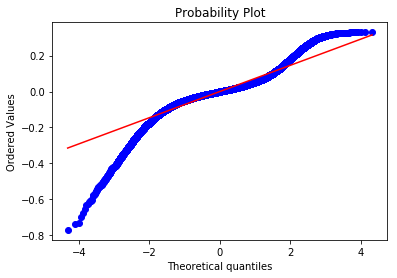

In [358]:
sp.stats.probplot(result1.resid,plot=plt)
plt.show()

## result score : 0.0652745